**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique os filtros  Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

In [31]:
def adicionar_padding(imagem, altura_mascara, largura_mascara):
    pad_h = altura_mascara // 2
    pad_w = largura_mascara // 2
    return np.pad(imagem, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

def aplicar_convolucao(imagem, mascara):
    imagem_padded = adicionar_padding(imagem, mascara.shape[0], mascara.shape[1])
    resultado = np.zeros_like(imagem, dtype=np.float64)

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            janela = imagem_padded[i:i+mascara.shape[0], j:j+mascara.shape[1]]
            resultado[i, j] = np.sum(janela * mascara)

    return resultado

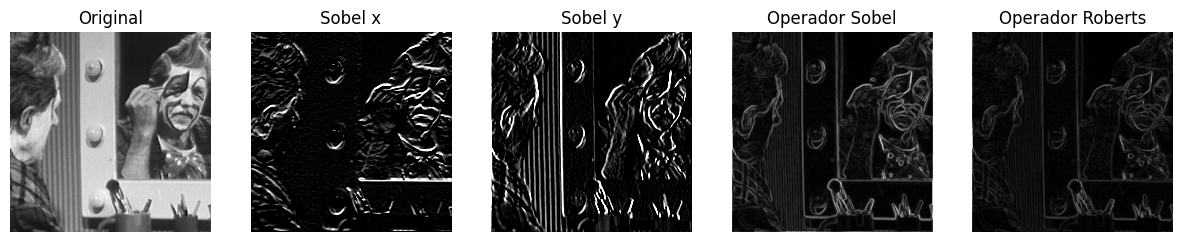

In [32]:
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

mascara_sobel_x = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

mascara_sobel_y = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

mascara_roberts_x = np.array([[1, 0],
                            [0, -1]])

mascara_roberts_y = np.array([[0, 1],
                            [-1, 0]])

sobel_x = aplicar_convolucao(img1, mascara_sobel_x)
sobel_y = aplicar_convolucao(img1, mascara_sobel_y)

roberts_x = aplicar_convolucao(img1, mascara_roberts_x)
roberts_y = aplicar_convolucao(img1, mascara_roberts_y)

# 3. Calcular a magnitude das bordas
magnitude_sobel = np.sqrt(sobel_x**2 + sobel_y**2)
magnitude_sobel = (magnitude_sobel / magnitude_sobel.max()) * 255

magnitude_roberts = np.sqrt(roberts_x**2 + roberts_y**2)
magnitude_roberts = (magnitude_roberts / magnitude_roberts.max()) * 255

# Mostrar os resultados
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original')

axs[1].imshow(sobel_x, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Sobel x')

axs[2].imshow(sobel_y, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Sobel y')

axs[3].imshow(magnitude_sobel, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Operador Sobel')

axs[4].imshow(magnitude_roberts, cmap='gray', vmin=0, vmax=255)
axs[4].set_title('Operador Roberts')

for ax in axs:
    ax.axis('off')

plt.show()


2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

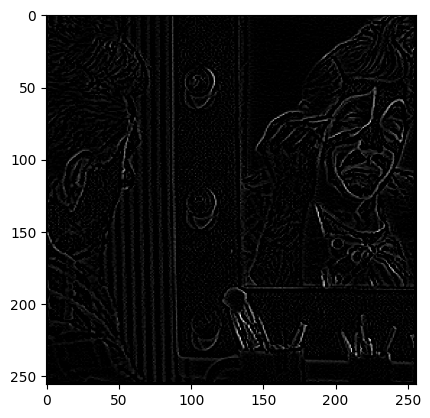

In [33]:
# code here

img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

mascara_laplaciano = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

filtro_laplaciano = aplicar_convolucao(img1, mascara_laplaciano)
plt.imshow(filtro_laplaciano, cmap='gray', vmin=0, vmax=255)



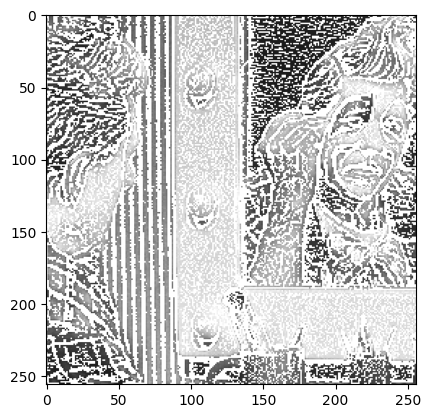

In [42]:
def unsharp_mask(image, k):
    # Blur the image using Gaussian filter
    blur = cv2.GaussianBlur(image, (5, 5), 0)


    # Subtrai a imagem borrada da imagem original
    mascara = np.subtract(image, blur)

    # adiciona a mascara na imagem
    unsharp = np.clip(np.add(image, k * mascara), 0, 255).astype(np.uint8)

    return unsharp

# Carregar a imagem
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro de unsharp mask
unsharp_image = unsharp_mask(img1, k = 1.0)

# plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.imshow(unsharp_image, cmap='gray', vmin=0, vmax=255)


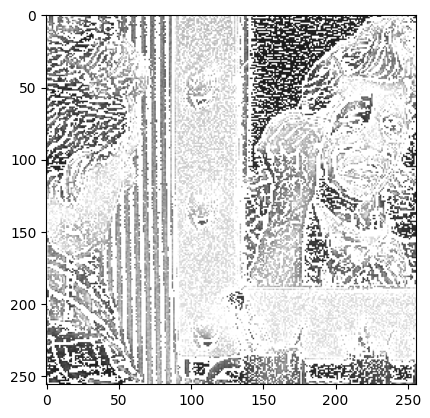

In [58]:
# Carregar a imagem
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro de unsharp mask
highboost = unsharp_mask(img1, k = 5.0)

plt.imshow(highboost, cmap='gray', vmin=0, vmax=255)

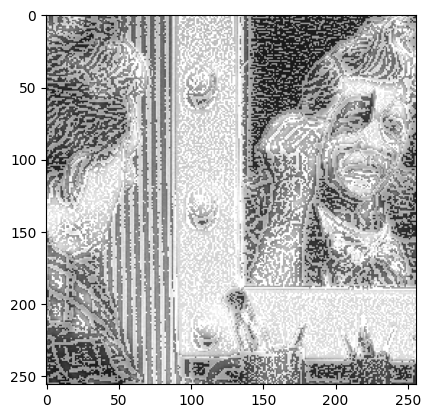

In [49]:
# Carregar a imagem
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro de unsharp mask
atenuado = unsharp_mask(img1, k = 0.5)

plt.imshow(atenuado, cmap='gray', vmin=0, vmax=255)

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

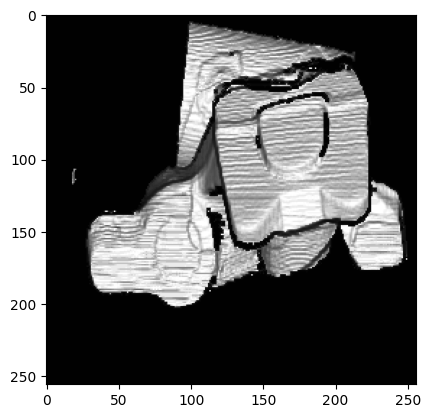

In [59]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)


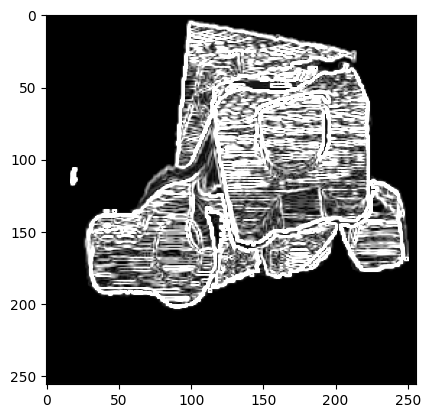

In [59]:
# code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

mascara_sobel_x = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

mascara_sobel_y = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_x = aplicar_convolucao(img1, mascara_sobel_x)
sobel_y = aplicar_convolucao(img1, mascara_sobel_y)

magnitude_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

plt.imshow(magnitude_sobel, cmap='gray', vmin=0, vmax=255)


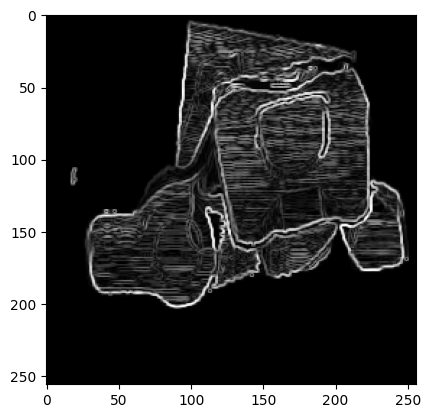

In [63]:
# code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
img1 = img1 * 0.25
# plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

mascara_sobel_x = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

mascara_sobel_y = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_x = aplicar_convolucao(img1, mascara_sobel_x)
sobel_y = aplicar_convolucao(img1, mascara_sobel_y)

magnitude_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

plt.imshow(magnitude_sobel, cmap='gray', vmin=0, vmax=255)

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

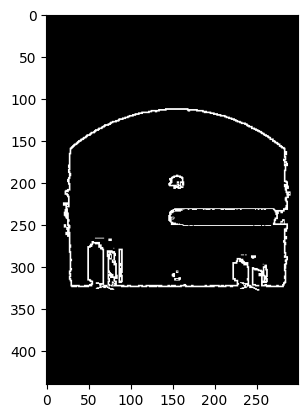

In [66]:

#code here
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

mascara_sobel_x = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

mascara_sobel_y = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_x = aplicar_convolucao(img1, mascara_sobel_x)
sobel_y = aplicar_convolucao(img1, mascara_sobel_y)

magnitude_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

_, imagem_binaria = cv2.threshold(magnitude_sobel, 150, 1, cv2.THRESH_BINARY)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

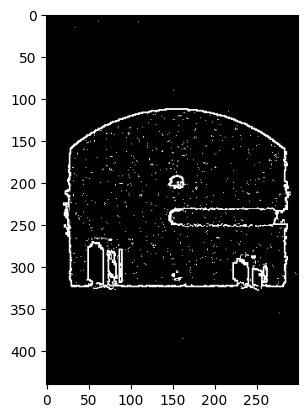

In [67]:
#code here

#code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

mascara_sobel_x = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

mascara_sobel_y = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_x = aplicar_convolucao(img1, mascara_sobel_x)
sobel_y = aplicar_convolucao(img1, mascara_sobel_y)

magnitude_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

_, imagem_binaria = cv2.threshold(magnitude_sobel, 150, 1, cv2.THRESH_BINARY)

plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=1)